In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
dataset = pd.read_csv("CarPrice_Assignment.csv")

In [5]:
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
print(dataset.dtypes)

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object


In [8]:
categorical_cols = dataset.select_dtypes(include=["object"]).columns

In [9]:
categorical_cols

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [10]:
print(dataset.nunique())

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64


In [11]:
dataset = pd.get_dummies(dataset, columns=categorical_cols, drop_first=True)

In [12]:
print(dataset.head())

   car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0       1          3       88.6      168.8      64.1       48.8        2548   
1       2          3       88.6      168.8      64.1       48.8        2548   
2       3          1       94.5      171.2      65.5       52.4        2823   
3       4          2       99.8      176.6      66.2       54.3        2337   
4       5          2       99.4      176.6      66.4       54.3        2824   

   enginesize  boreratio  stroke  ...  cylindernumber_three  \
0         130       3.47    2.68  ...                 False   
1         130       3.47    2.68  ...                 False   
2         152       2.68    3.47  ...                 False   
3         109       3.19    3.40  ...                 False   
4         136       3.19    3.40  ...                 False   

   cylindernumber_twelve  cylindernumber_two  fuelsystem_2bbl  \
0                  False               False            False   
1               

In [13]:
X = dataset.drop('price',axis=1)
Y= dataset['price'] 

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [15]:
model = LinearRegression()

In [16]:
model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
Y_pred = model.predict(X_test)

In [18]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test,Y_pred)
print(f'mean squared error:{mse:.2f}')
print(f'R-squared:{r2:.2f}')

mean squared error:176760096.86
R-squared:-1.24


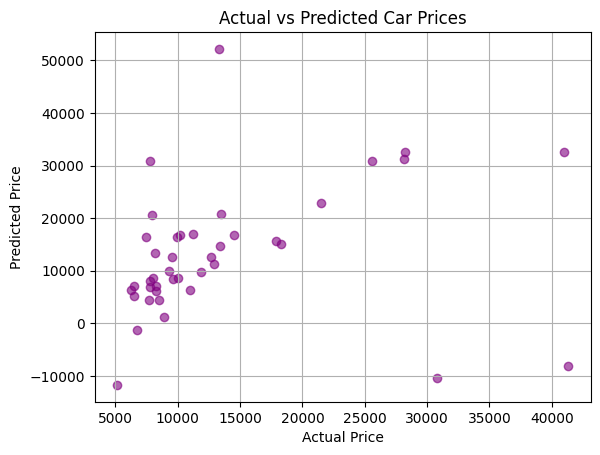

In [19]:
plt.scatter(Y_test, Y_pred, color='purple', alpha=0.6)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.grid(True)
plt.show()

In [20]:
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients (Slopes):")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef:.2f}")

print(f"Intercept: {intercept:.2f}")


Coefficients (Slopes):
car_ID: 226.49
symboling: 1278.89
wheelbase: 97.32
carlength: -246.44
carwidth: 840.04
carheight: -402.45
curbweight: 17.54
enginesize: -10.81
boreratio: -4065.32
stroke: -582.40
compressionratio: -789.84
horsepower: -19.63
peakrpm: 2.49
citympg: 396.20
highwaympg: -228.84
CarName_alfa-romero Quadrifoglio: 22188.98
CarName_alfa-romero giulia: 18971.60
CarName_alfa-romero stelvio: 21750.11
CarName_audi 100 ls: 22251.07
CarName_audi 100ls: 2402.69
CarName_audi 4000: 3699.38
CarName_audi 5000: 2927.54
CarName_audi 5000s (diesel): 0.00
CarName_audi fox: 5778.24
CarName_bmw 320i: 27235.80
CarName_bmw x1: 40616.79
CarName_bmw x3: 39223.55
CarName_bmw x4: -0.00
CarName_bmw x5: -0.00
CarName_bmw z4: 36557.95
CarName_buick century: -0.00
CarName_buick century luxus (sw): 0.00
CarName_buick century special: 0.00
CarName_buick electra 225 custom: 0.00
CarName_buick opel isuzu deluxe: 1671.48
CarName_buick regal sport coupe (turbo): 14602.01
CarName_buick skyhawk: -3277.99
C